<a href="https://colab.research.google.com/github/AdamClarkStandke/GenerativeDeepLearning/blob/main/PixelCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PixelCNN++

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download jessicali9530/celeba-dataset
!unzip -d dataset celeba-dataset.zip

In [21]:
IMAGE_SIZE = 16
CHANNELS = 3
BATCH_SIZE = 10
EPOCHS = 10
N_COMPONENTS = 5

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import (
    layers,
    models,
    callbacks,
    utils,
    metrics,
    losses,
    optimizers
)

from scipy.stats import norm
import pandas as pd
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

In [41]:
train_data = utils.image_dataset_from_directory(
    "dataset/img_align_celeba/img_align_celeba",
    labels=None,
    color_mode="rgb",
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    interpolation="bilinear",
)


Found 202599 files belonging to 1 classes.


In [38]:
def display(
    images, n=10, size=(20, 3), cmap=None, as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

In [30]:
dist = tfp.distributions.PixelCNN(
    image_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    num_resnet=1,
    num_hierarchies=2,
    num_filters=32,
    num_logistic_mix=N_COMPONENTS,
    dropout_p=0.3,
                                  )
# Define the model input
image_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Define the log likelihood for the loss fn
log_prob = dist.log_prob(image_input)

# Define the model
pixelcnn = models.Model(inputs=image_input, outputs=log_prob)
pixelcnn.add_loss(-tf.reduce_mean(log_prob))

In [39]:
# Compile and train the model
pixelcnn.compile(
    optimizer=optimizers.Adam(0.001),
)

class ImageGenerator(callbacks.Callback):
    def __init__(self, num_img):
        self.num_img = num_img

    def generate(self):
        return dist.sample(self.num_img).numpy()

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.generate()
        display(
            generated_images,
            n=self.num_img,
            save_to="drive/MyDrive/images/generated_img_%03d.png" % (epoch),
        )


img_generator_callback = ImageGenerator(num_img=2)

Epoch 1/10
20259/20260 [============================>.] - ETA: 0s - loss: 2735.2654
Saved to drive/MyDrive/images/generated_img_000.png


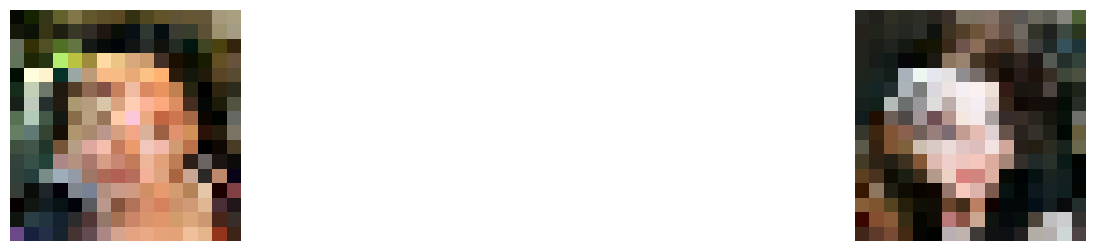

20260/20260 [==============================] - 2276s 111ms/step - loss: 2735.2656
Epoch 2/10
20260/20260 [==============================] - ETA: 0s - loss: 2631.4939
Saved to drive/MyDrive/images/generated_img_001.png


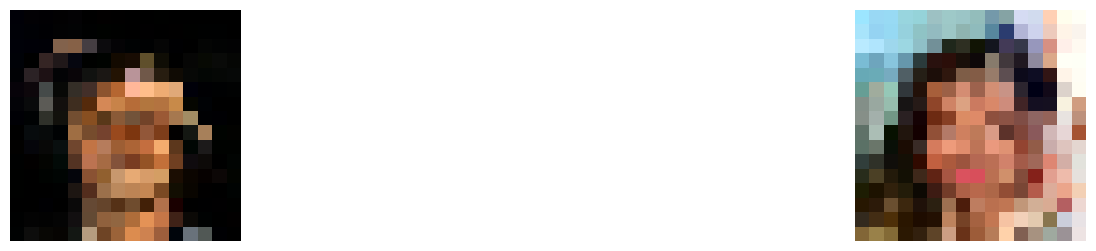

20260/20260 [==============================] - 2279s 113ms/step - loss: 2631.4939
Epoch 3/10
20260/20260 [==============================] - ETA: 0s - loss: 2604.1667
Saved to drive/MyDrive/images/generated_img_002.png


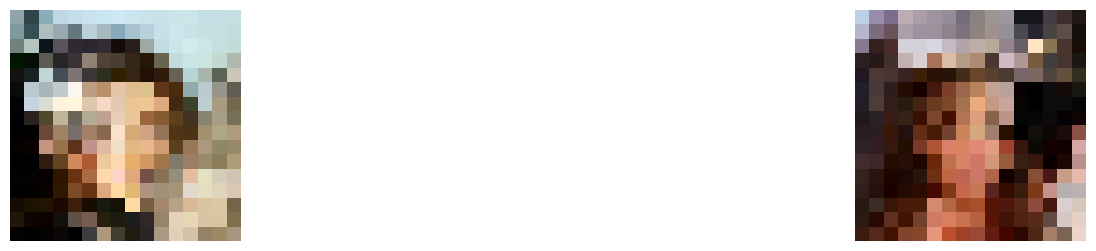

20260/20260 [==============================] - 2293s 113ms/step - loss: 2604.1667
Epoch 4/10
20260/20260 [==============================] - ETA: 0s - loss: 2587.4192
Saved to drive/MyDrive/images/generated_img_003.png


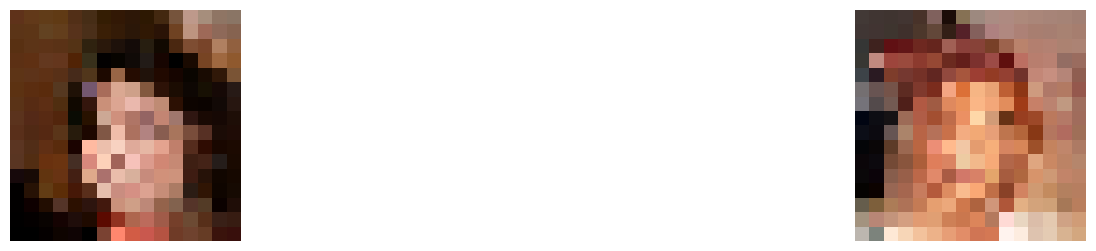

20260/20260 [==============================] - 2281s 113ms/step - loss: 2587.4192
Epoch 5/10
20259/20260 [============================>.] - ETA: 0s - loss: 2577.2500
Saved to drive/MyDrive/images/generated_img_004.png


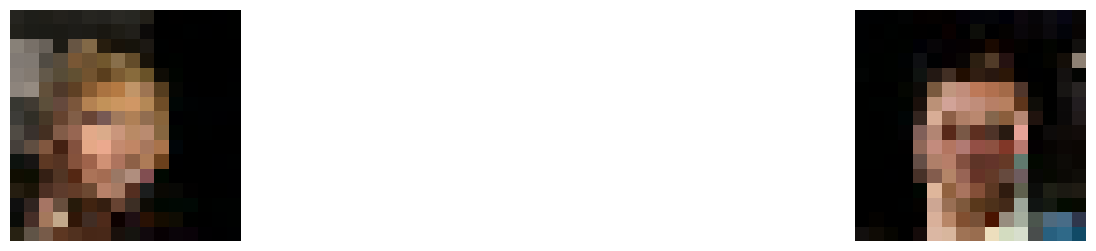

20260/20260 [==============================] - 2257s 111ms/step - loss: 2577.2502
Epoch 6/10
20259/20260 [============================>.] - ETA: 0s - loss: 2569.3579
Saved to drive/MyDrive/images/generated_img_005.png


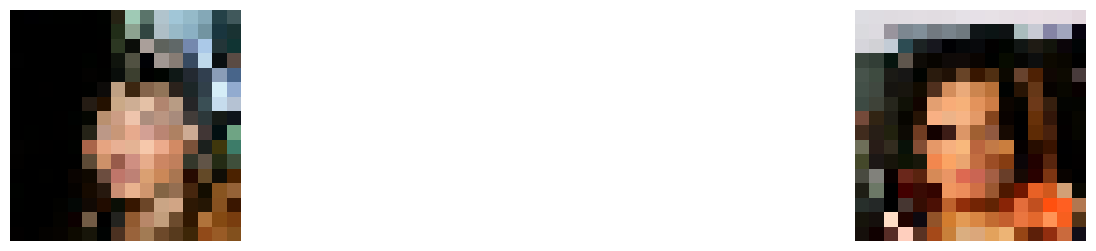

20260/20260 [==============================] - 2238s 110ms/step - loss: 2569.3547
Epoch 7/10
20259/20260 [============================>.] - ETA: 0s - loss: 2563.1379
Saved to drive/MyDrive/images/generated_img_006.png


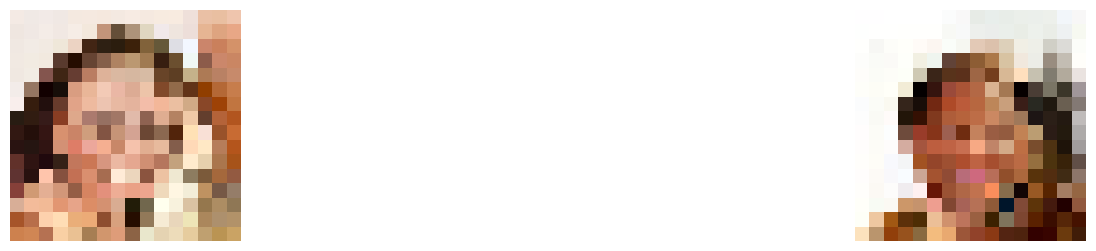

20260/20260 [==============================] - 2205s 109ms/step - loss: 2563.1372
Epoch 8/10
20260/20260 [==============================] - ETA: 0s - loss: 2558.5779
Saved to drive/MyDrive/images/generated_img_007.png


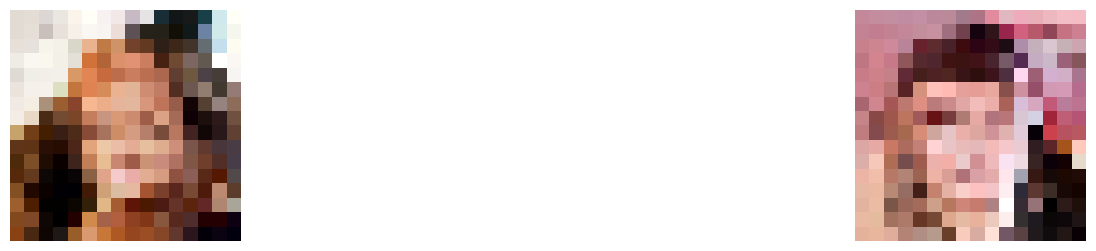

20260/20260 [==============================] - 2247s 111ms/step - loss: 2558.5779
Epoch 9/10
20260/20260 [==============================] - ETA: 0s - loss: 2554.7229
Saved to drive/MyDrive/images/generated_img_008.png


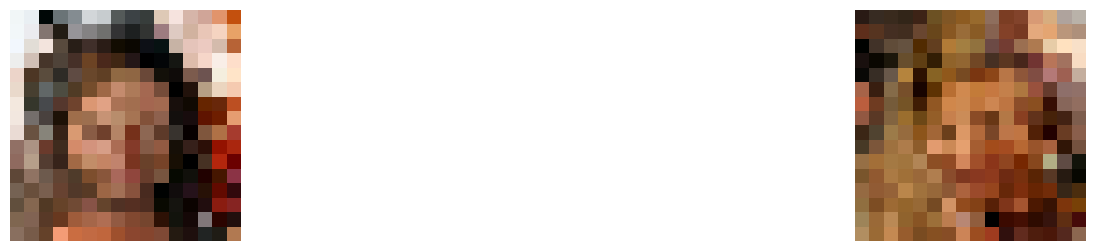

20260/20260 [==============================] - 2181s 108ms/step - loss: 2554.7229
Epoch 10/10
20260/20260 [==============================] - ETA: 0s - loss: 2551.2729
Saved to drive/MyDrive/images/generated_img_009.png


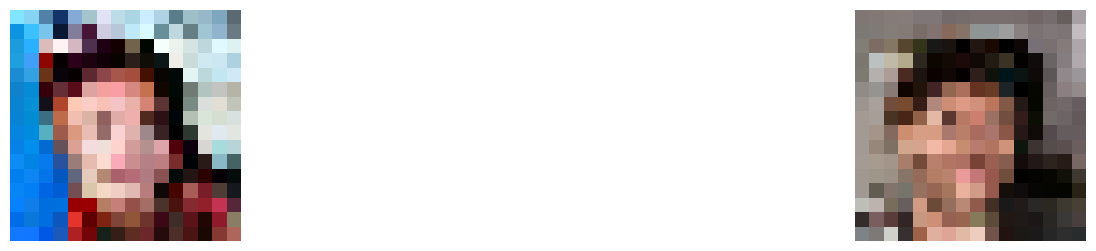

20260/20260 [==============================] - 2197s 108ms/step - loss: 2551.2729


In [42]:
pixelcnn.fit(
    train_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=True,
    callbacks=[img_generator_callback],
)

In [43]:
generated_images = img_generator_callback.generate()

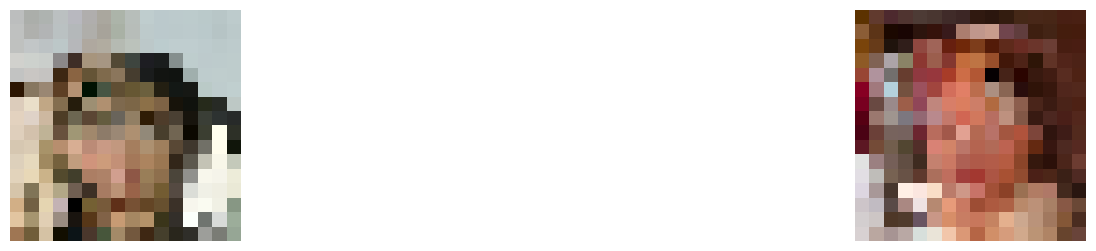

In [44]:
display(generated_images, n=img_generator_callback.num_img)